In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns

from matplotlib.gridspec import GridSpec
from Caulimate.Data.SimLinGau import LinGauSuff
from Caulimate.Utils.Tools import bin_mat
from Caulimate.Utils.GraphMetric import count_graph_accuracy
from Caulimate.Utils.GraphUtils import corrupt_dag

In [2]:

plt.switch_backend('agg')
matplotlib.rcParams['pdf.fonttype'] = 42
# font = {'size': 8, 'family': 'SimSun'}
# plt.rc('font', **font)

x = np.array([10**2, 10**2.5, 10**3, 10**3.5,10**4])
# Figure 1: Normalized SHD
# Data for Normalized SHD
normalized_shd_golem_ev = [11, 2.6, 4e-1, 2e-1, 8e-2]
normalized_shd_golem_ev_l1 = [8e-1, 1e-2, 8e-3, 6e-3, 4e-3]
# normalized_shd_golem_ev = []
# normalized_shd_golem_ev_l1 = []
# normalized_shd_golem_ev_plain = []


# Figure 2: TPR
# Data for TPR
tpr_golem_ev = np.array([0.5, 0.6, 0.55, 0.57, 0.51])
tpr_golem_ev_l1 = np.array([0.6, 0.81, 0.95, 1, 1])
# tpr_golem_ev = []
# tpr_golem_ev_l1 = []
# tpr_golem_ev_plain = []

# Figure 3: h(B)
# Data for h(B)
hb_golem_ev =[6e-1, 3e-3, 1.5e-2, 6.2e-2, 5.3e-2]
hb_golem_ev_l1 = [3e-1, 1e-2, 1e-3, 2e-3, 3e-4]
# hb_golem_ev = []
# hb_golem_ev_l1 = []
# hb_golem_ev_plain = []

frob_norm = [8e-1, 1e-1, 2.5e-1, 2e-1, 1.6e-1]
frob_norm_l2 = [8e-2, 1e-2, 2.5e-3, 2e-3, 2.2e-3]

fig, axs = plt.subplots(2, 2, figsize=(18, 5))

plt.subplots_adjust(hspace = 0.4)

# Plot Normalized SHD
axs[0][0].set_xscale('log')
axs[0][0].set_yscale('log')
axs[0][0].plot(x, normalized_shd_golem_ev,  marker='o', markerfacecolor='None', markersize=12, linestyle='-', color='blue', label='GOLEM')
axs[0][0].plot(x, normalized_shd_golem_ev_l1, marker='v', markerfacecolor='None', markersize=12, linestyle='-', color='orange', label='TV-GOLEM')
# axs[0].set_title('Normalized SHD')
axs[0][0].set_xlabel('n (Sample size)',  fontsize=10)
axs[0][0].set_ylabel('Normalized SHD' ,  fontsize=10)
axs[0][0].set_yticks([10**-3, 10**-2, 10**-1, 10**0, 10**1], [r'$10^{-3}$', r'$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$'])
axs[0][0].set_ylim(10**-3, 10**2) 
axs[0][0].grid(True, which='major', linestyle='--', color='gray')
axs[0][0].grid(True, which='minor', linestyle='', color='gray')

# Plot TPR
axs[0][1].set_xscale('log')
axs[0][1].plot(x, tpr_golem_ev, marker='o', markerfacecolor='None', markersize=12, linestyle='-', color='blue', label='GOLEM')
axs[0][1].plot(x, tpr_golem_ev_l1, marker='v', markerfacecolor='None', markersize=12, linestyle='-', color='orange', label='TV-GOLEM')
# axs[1].set_title('TPR')
axs[0][1].set_xlabel('n (Sample size)',  fontsize=10)
axs[0][1].set_ylabel('TPR' ,  fontsize=10)
axs[0][1].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
axs[0][1].set_ylim(0.48, 1.1)
axs[0][1].grid(True, which='major', linestyle='--', color='gray')
axs[0][1].grid(True, which='minor', linestyle='', color='gray')

# Plot h(B)
axs[1][0].set_xscale('log')
axs[1][0].set_yscale('log')
axs[1][0].plot(x, hb_golem_ev, marker='o', markerfacecolor='None', markersize=12, linestyle='-', color='blue', label='GOLEM')
axs[1][0].plot(x, hb_golem_ev_l1, marker='v', markerfacecolor='None', markersize=12, linestyle='-', color='orange', label='TV-GOLEM')
# axs[2].set_title('h(B)')
axs[1][0].set_xlabel('n (Sample size)',  fontsize=10)
axs[1][0].set_ylabel('h(B)' ,  fontsize=10)
axs[1][0].set_yticks([1e-3, 1e-2, 1e-1, 1, 10], ['$10^{-3}$','$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$'])
axs[1][0].grid(True, which='major', linestyle='--', color='gray')
axs[1][0].grid(True, which='minor', linestyle='', color='gray')

# Plot avg l2
axs[1][1].set_xscale('log')
axs[1][1].set_yscale('log')
axs[1][1].plot(x, frob_norm, marker='o', markerfacecolor='None', markersize=12, linestyle='-', color='blue', label='GOLEM')
axs[1][1].plot(x, frob_norm_l2, marker='v', markerfacecolor='None', markersize=12, linestyle='-', color='orange', label='TV-GOLEM')
# axs[2].set_title('h(B)')
axs[1][1].set_xlabel('n (Sample size)',  fontsize=10)
axs[1][1].set_ylabel('Frobenius Norm' ,  fontsize=10)
axs[1][1].set_yticks([1e-3, 1e-2, 1e-1, 1, 10], ['$10^{-3}$','$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$'])
axs[1][1].grid(True, which='major', linestyle='--', color='gray')
axs[1][1].grid(True, which='minor', linestyle='', color='gray')


# fig.legend()
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))
plt.show()
plt.savefig('./Figures/LinGauComp.pdf', bbox_inches='tight')


In [3]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([10**2, 10**2.5, 10**3, 10**3.5,10**4])
# Figure 1: Normalized SHD
# Data for Normalized SHD
normalized_shd_golem_ev = [11, 2.6, 4e-1, 2e-1, 8e-2]
normalized_shd_golem_ev_l1 = [8e-1, 1e-2, 8e-3, 6e-3, 4e-3]
# normalized_shd_golem_ev = []
# normalized_shd_golem_ev_l1 = []
# normalized_shd_golem_ev_plain = []


# Figure 2: TPR
# Data for TPR
tpr_golem_ev = np.array([0.5, 0.6, 0.55, 0.57, 0.51])
tpr_golem_ev_l1 = np.array([0.6, 0.81, 0.95, 1, 1])
# tpr_golem_ev = []
# tpr_golem_ev_l1 = []
# tpr_golem_ev_plain = []

# Figure 3: h(B)
# Data for h(B)
hb_golem_ev =[6e-1, 3e-3, 1.5e-2, 6.2e-2, 5.3e-2]
hb_golem_ev_l1 = [3e-1, 1e-2, 1e-3, 2e-3, 3e-4]
# hb_golem_ev = []
# hb_golem_ev_l1 = []
# hb_golem_ev_plain = []

frob_norm = [8e-1, 1e-1, 2.5e-1, 2e-1, 1.6e-1]
frob_norm_l2 = [8e-2, 1e-2, 2.5e-3, 2e-3, 2.2e-3]

fig, axs = plt.subplots(2, 2, figsize=(18, 5))

# Plot Normalized SHD
axs[0][0].set_xscale('log')
axs[0][0].set_yscale('log')
axs[0][0].plot(x, normalized_shd_golem_ev,  marker='o', markerfacecolor='None', markersize=12, linestyle='-', color='blue', label='GOLEM')
axs[0][0].plot(x, normalized_shd_golem_ev_l1, marker='v', markerfacecolor='None', markersize=12, linestyle='-', color='orange', label='TV-GOLEM')
# axs[0].set_title('Normalized SHD')
axs[0][0].set_xlabel('n (Sample size)',  fontsize=10)
axs[0][0].set_ylabel('Normalized SHD' ,  fontsize=10)
axs[0][0].set_yticks([10**-3, 10**-2, 10**-1, 10**0, 10**1], [r'$10^{-3}$', r'$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$'])
axs[0][0].set_ylim(10**-3, 10**2) 
axs[0][0].grid(True, which='major', linestyle='--', color='gray')
axs[0][0].grid(True, which='minor', linestyle='', color='gray')

# Plot TPR
axs[0][1].set_xscale('log')
axs[0][1].plot(x, tpr_golem_ev, marker='o', markerfacecolor='None', markersize=12, linestyle='-', color='blue', label='GOLEM')
axs[0][1].plot(x, tpr_golem_ev_l1, marker='v', markerfacecolor='None', markersize=12, linestyle='-', color='orange', label='TV-GOLEM')
# axs[1].set_title('TPR')
axs[0][1].set_xlabel('n (Sample size)',  fontsize=10)
axs[0][1].set_ylabel('TPR' ,  fontsize=10)
axs[0][1].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
axs[0][1].set_ylim(0.48, 1.1)
axs[0][1].grid(True, which='major', linestyle='--', color='gray')
axs[0][1].grid(True, which='minor', linestyle='', color='gray')

# Plot h(B)
axs[1][0].set_xscale('log')
axs[1][0].set_yscale('log')
axs[1][0].plot(x, hb_golem_ev, marker='o', markerfacecolor='None', markersize=12, linestyle='-', color='blue', label='GOLEM')
axs[1][0].plot(x, hb_golem_ev_l1, marker='v', markerfacecolor='None', markersize=12, linestyle='-', color='orange', label='TV-GOLEM')
# axs[2].set_title('h(B)')
axs[1][0].set_xlabel('n (Sample size)',  fontsize=10)
axs[1][0].set_ylabel('h(B)' ,  fontsize=10)
axs[1][0].set_yticks([1e-3, 1e-2, 1e-1, 1, 10], ['$10^{-3}$','$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$'])
axs[1][0].grid(True, which='major', linestyle='--', color='gray')
axs[1][0].grid(True, which='minor', linestyle='', color='gray')

# Plot avg l2
axs[1][1].set_xscale('log')
axs[1][1].set_yscale('log')
axs[1][1].plot(x, frob_norm, marker='o', markerfacecolor='None', markersize=12, linestyle='-', color='blue', label='GOLEM')
axs[1][1].plot(x, frob_norm_l2, marker='v', markerfacecolor='None', markersize=12, linestyle='-', color='orange', label='TV-GOLEM')
# axs[2].set_title('h(B)')
axs[1][1].set_xlabel('n (Sample size)',  fontsize=10)
axs[1][1].set_ylabel('Frobenius Norm' ,  fontsize=10)
axs[1][1].set_yticks([1e-3, 1e-2, 1e-1, 1, 10], ['$10^{-3}$','$10^{-2}$', '$10^{-1}$', '$10^0$', '$10^1$'])
axs[1][1].grid(True, which='major', linestyle='--', color='gray')
axs[1][1].grid(True, which='minor', linestyle='', color='gray')


# fig.legend()
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))
plt.show()

In [4]:

data = LinGauSuff(1000, 100, 3, 200, max_eud=300, vary_func=np.cos, seed=3)
B1 = data.B

true_W = B1
B1_est = corrupt_dag(true_W.copy(), 13, 16)
estimated_W = B1_est + np.random.normal(scale=0.5, size=B1.shape) * bin_mat(B1_est)
print(count_graph_accuracy(bin_mat(true_W), bin_mat(estimated_W)))

true_A1 = np.array([[0, 0, 0, 0, -0.37],
                    [0, 0, 0, 0, 0.38],
                    [0, 0, 0, 0, 0.33],
                    [-0.41, 0.37, 0, 0.43, 0],
                    [0, -0.34, 0, 0, 0]])

estimated_A1 = np.array([[-0.015, -0.06, 0.03, 0.052, -0.34],
                         [0, 0, 0, 0, 0.32],
                         [0, -0.12, 0, 0, 0.41],
                         [-0.46, 0.38, 0.037, 0.38, 0],
                         [0, -0.27, 0, 0.034, 0]])

# Set up the figure and axes with GridSpec for a square layout
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 2, width_ratios=[1, 1], height_ratios=[1])

vmin = -2  # set the colorbar range min
vmax = 2   # set the colorbar range max

# Plot True W
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(true_W, ax=ax1, cmap='coolwarm', cbar=False, annot=False, fmt=".2f", vmin=vmin, vmax=vmax)
ax1.set_title('Truth')

# Plot Estimated W
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(estimated_W, ax=ax2, cmap='coolwarm', cbar=False, annot=False, fmt=".2f", vmin=vmin, vmax=vmax)
ax2.set_title('Estimation')

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(ax1.collections[0], cax=cbar_ax)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar
plt.savefig('./Figures/LinGauHeatmap100.pdf', format='pdf')
plt.show()

{'fdr': 0.11570247933884298, 'tpr': 0.9067796610169492, 'fpr': 0.0028973509933774835, 'shd': 25, 'noramlized shd': 0.0025252525252525255, 121: 121}


/tmp/ipykernel_1072916/1844710999.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar


In [5]:

data = LinGauSuff(1000, 50, 3, 200, max_eud=300, vary_func=np.cos, seed=3)
B1 = data.B

true_W = B1
B1_est = corrupt_dag(true_W.copy(), 4, 6)
estimated_W = B1_est + np.random.normal(scale=0.2, size=B1.shape) * bin_mat(B1_est)
print(count_graph_accuracy(bin_mat(true_W), bin_mat(estimated_W)))

true_A1 = np.array([[0, 0, 0, 0, -0.37],
                    [0, 0, 0, 0, 0.38],
                    [0, 0, 0, 0, 0.33],
                    [-0.41, 0.37, 0, 0.43, 0],
                    [0, -0.34, 0, 0, 0]])

estimated_A1 = np.array([[-0.015, -0.06, 0.03, 0.052, -0.34],
                         [0, 0, 0, 0, 0.32],
                         [0, -0.12, 0, 0, 0.41],
                         [-0.46, 0.38, 0.037, 0.38, 0],
                         [0, -0.27, 0, 0.034, 0]])

# Set up the figure and axes with GridSpec for a square layout
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 2, width_ratios=[1, 1], height_ratios=[1])

vmin = -2  # set the colorbar range min
vmax = 2   # set the colorbar range max

# Plot True W
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(true_W, ax=ax1, cmap='coolwarm', cbar=False, annot=False, fmt=".2f", vmin=vmin, vmax=vmax)
ax1.set_title('Truth')

# Plot Estimated W
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(estimated_W, ax=ax2, cmap='coolwarm', cbar=False, annot=False, fmt=".2f", vmin=vmin, vmax=vmax)
ax2.set_title('Estimation')

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(ax1.collections[0], cax=cbar_ax)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar
plt.savefig('./Figures/LinGauHeatmap50.pdf', format='pdf')
plt.show()

{'fdr': 0.09523809523809523, 'tpr': 0.9344262295081968, 'fpr': 0.005154639175257732, 'shd': 10, 'noramlized shd': 0.004081632653061225, 63: 63}


/tmp/ipykernel_1072916/1746887468.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar


In [6]:

data = LinGauSuff(1000, 20, 3, 200, max_eud=300, vary_func=np.cos, seed=3)
B1 = data.B

def modify_dag(adj_matrix, n, m):
    size = adj_matrix.shape[0]
    non_diag_indices = np.where(~np.eye(size, dtype=bool))  # Indices of non-diagonal elements
    
    # Set n elements to 0
    non_zero_indices = np.nonzero(adj_matrix[non_diag_indices])[0]
    indices_to_zero = np.random.choice(non_zero_indices, n, replace=False)
    adj_matrix[non_diag_indices[0][indices_to_zero], non_diag_indices[1][indices_to_zero]] = 0
    
    # Add m zero-elements with a random value
    zero_indices = np.where(adj_matrix[non_diag_indices] == 0)[0]
    indices_to_fill = np.random.choice(zero_indices, m, replace=False)
    for index in indices_to_fill:
        adj_matrix[non_diag_indices[0][index], non_diag_indices[1][index]] = np.random.randint(1, 10)
    
    # Check if the graph is still a DAG
    # If not, undo the last modification and try again
    # This part is left as an exercise for the reader

    return adj_matrix

true_W = B1
B1_est = modify_dag(true_W.copy(), 2, 2)
estimated_W = B1_est + np.random.normal(scale=0.1, size=B1.shape) * bin_mat(B1_est)
print(count_graph_accuracy(bin_mat(true_W), bin_mat(estimated_W)))

true_A1 = np.array([[0, 0, 0, 0, -0.37],
                    [0, 0, 0, 0, 0.38],
                    [0, 0, 0, 0, 0.33],
                    [-0.41, 0.37, 0, 0.43, 0],
                    [0, -0.34, 0, 0, 0]])

estimated_A1 = np.array([[-0.015, -0.06, 0.03, 0.052, -0.34],
                         [0, 0, 0, 0, 0.32],
                         [0, -0.12, 0, 0, 0.41],
                         [-0.46, 0.38, 0.037, 0.38, 0],
                         [0, -0.27, 0, 0.034, 0]])

# Set up the figure and axes with GridSpec for a square layout
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 2, width_ratios=[1, 1], height_ratios=[1])

vmin = -2  # set the colorbar range min
vmax = 2   # set the colorbar range max

# Plot True W
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(true_W, ax=ax1, cmap='coolwarm', cbar=False, annot=False, fmt=".2f", vmin=vmin, vmax=vmax)
ax1.set_title('Truth')

# Plot Estimated W
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(estimated_W, ax=ax2, cmap='coolwarm', cbar=False, annot=False, fmt=".2f", vmin=vmin, vmax=vmax)
ax2.set_title('Estimation')

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(ax1.collections[0], cax=cbar_ax)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar
plt.savefig('./Figures/LinGauHeatmap20.pdf', format='pdf')
plt.show()

{'fdr': 0.08, 'tpr': 0.92, 'fpr': 0.012121212121212121, 'shd': 4, 'noramlized shd': 0.010526315789473684, 25: 25}


/tmp/ipykernel_1072916/4126318772.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar


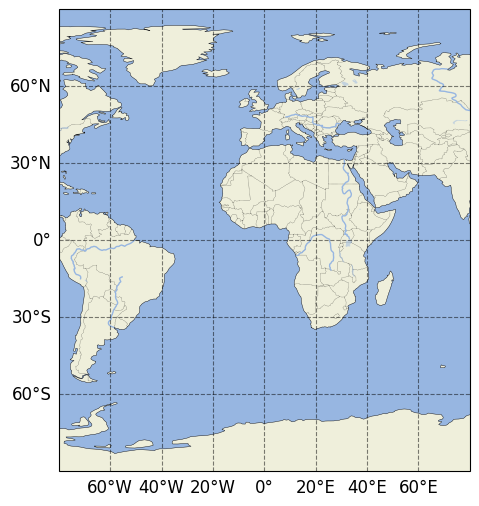

In [2]:
from Caulimate.Utils.Visualization import quick_map

fig, ax = quick_map()
ax.set_extent([-80, 80, -90, 90])